In [88]:
import pandas as pd
import networkx as nx

# Load scraped job data

In [89]:
df = pd.read_excel("new.xlsx")
df

,Job Domain,Skills Required
0,Software Developer,Java\nGit\nDocker\nSql
1,Software Developer,Java\nGit\nPython\nSql
2,Software Developer,Linux\nJavascript
3,Software Developer,Java\nGit\nDocker\nSql
4,Software Developer,Java\nGit\nPython\nSql
...,...,...
270,Transportation Engineer,Scm\nTechno-Functional Support\nCloud\nOracle ...
271,Transportation Engineer,Scm\nTechno-Functional Support\nCloud\nOracle ...
272,Transportation Engineer,Scm\nTechno-Functional Support\nCloud\nOracle ...
273,Transportation Engineer,Scm\nTechno-Functional Support\nCloud\nOracle ...


In [90]:
df_skills_split = df["Skills Required"].str.split("\n", expand=True)

for column in df_skills_split.columns:
    df_skills_split[column]=df_skills_split[column].str.lower()

df_skills_split 




,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,java,git,docker,sql,None,None,None,None,None,None,None,None,None,None
1,java,git,python,sql,None,None,None,None,None,None,None,None,None,None
2,linux,javascript,None,None,None,None,None,None,None,None,None,None,None,None
3,java,git,docker,sql,None,None,None,None,None,None,None,None,None,None
4,java,git,python,sql,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,scm,techno-functional support,cloud,oracle fusion,None,None,None,None,None,None,None,None,None,None
271,scm,techno-functional support,cloud,oracle fusion,None,None,None,None,None,None,None,None,None,None
272,scm,techno-functional support,cloud,oracle fusion,None,None,None,None,None,None,None,None,None,None
273,scm,techno-functional support,cloud,oracle fusion,None,None,None,None,None,None,None,None,None,None


In [91]:
df_final=df.join(df_skills_split)

In [92]:
df_final.iloc[1:20,:]

,Job Domain,Skills Required,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1,Software Developer,Java\nGit\nPython\nSql,java,git,python,sql,None,None,None,None,None,None,None,None,None,None
2,Software Developer,Linux\nJavascript,linux,javascript,None,None,None,None,None,None,None,None,None,None,None,None
3,Software Developer,Java\nGit\nDocker\nSql,java,git,docker,sql,None,None,None,None,None,None,None,None,None,None
4,Software Developer,Java\nGit\nPython\nSql,java,git,python,sql,None,None,None,None,None,None,None,None,None,None
5,Software Developer,Linux\nJavascript,linux,javascript,None,None,None,None,None,None,None,None,None,None,None,None
6,Software Developer,Java\nGit\nDocker\nSql,java,git,docker,sql,None,None,None,None,None,None,None,None,None,None
7,Software Developer,Java\nGit\nDocker\nSql,java,git,docker,sql,None,None,None,None,None,None,None,None,None,None
8,Software Developer,Java\nGit\nDocker\nSql,java,git,docker,sql,None,None,None,None,None,None,None,None,None,None
9,Software Developer,Java\nGit\nDocker\nSql,java,git,docker,sql,None,None,None,None,None,None,None,None,None,None
10,Software Developer,Java\nGit\nDocker\nSql,java,git,docker,sql,None,None,None,None,None,None,None,None,None,None


In [93]:
df_final = df_final.drop('Skills Required', axis=1)

In [94]:
df_final

,Job Domain,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Software Developer,java,git,docker,sql,None,None,None,None,None,None,None,None,None,None
1,Software Developer,java,git,python,sql,None,None,None,None,None,None,None,None,None,None
2,Software Developer,linux,javascript,None,None,None,None,None,None,None,None,None,None,None,None
3,Software Developer,java,git,docker,sql,None,None,None,None,None,None,None,None,None,None
4,Software Developer,java,git,python,sql,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Transportation Engineer,scm,techno-functional support,cloud,oracle fusion,None,None,None,None,None,None,None,None,None,None
271,Transportation Engineer,scm,techno-functional support,cloud,oracle fusion,None,None,None,None,None,None,None,None,None,None
272,Transportation Engineer,scm,techno-functional support,cloud,oracle fusion,None,None,None,None,None,None,None,None,None,None
273,Transportation Engineer,scm,techno-functional support,cloud,oracle fusion,None,None,None,None,None,None,None,None,None,None


In [95]:
df_final['Job Domain'].nunique()

29

#We have 29 jobs listed in dataset.

In [96]:
df_final['Job Domain'].value_counts()

Job Domain
Game Developer                12
Blockchain Developer          12
Embedded Systems Engineer     12
Web Developer                 11
AI Engineer                   11
Software Developer            11
Full Stack Developer          10
Data Scientist                10
Cybersecurity Analyst         10
UI/UX Designer                10
Database Administrator        10
DevOps Engineer               10
ml Engineer                   10
Structural Engineer           10
Geotechnical Engineer         10
Robotics Engineer             10
Power Systems Engineer        10
Product Manager               10
Electrical Design Engineer    10
IoT Engineer                   9
Cloud Engineer                 9
Environmental Engineer         9
Systems Administrator          9
Mobile App Developer           8
Network Engineer               8
Control Systems Engineer       8
Data Analyst                   7
Transportation Engineer        6
Construction Manager           3
Name: count, dtype: int64

In [97]:
df_DS = df_final[df_final['Job Domain'] == 'Data Scientist']
df_DS 

,Job Domain,0,1,2,3,4,5,6,7,8,9,10,11,12,13
37,Data Scientist,cloud computing,tensorflow,ml,data visualization,data mining,big data,python,sql,statistical analysis,deep learning,None,None,None,None
38,Data Scientist,ml,ml,sql,python,None,None,None,None,None,None,None,None,None,None
39,Data Scientist,cloud computing,tensorflow,ml,data visualization,None,None,None,None,None,None,None,None,None,None
40,Data Scientist,data mining,big data,python,sql,None,None,None,None,None,None,None,None,None,None
41,Data Scientist,statistical analysis,deep learning,None,None,None,None,None,None,None,None,None,None,None,None
42,Data Scientist,ml,sql,python,None,None,None,None,None,None,None,None,None,None,None
43,Data Scientist,data mining,big data,python,sql,None,None,None,None,None,None,None,None,None,None
44,Data Scientist,statistical analysis,deep learning,None,None,None,None,None,None,None,None,None,None,None,None
45,Data Scientist,ml,sql,python,None,None,None,None,None,None,None,None,None,None,None
46,Data Scientist,llm,nlp,ai ml,None,None,None,None,None,None,None,None,None,None,None


In [98]:
skill_columns = df_DS.columns[1:]  # Skip 'Job Domain'

skill_lists = df_DS[skill_columns].apply(lambda row: [skill for skill in row if skill is not None], axis=1).tolist()

# Print result
print(skill_lists)

[['cloud computing', 'tensorflow', 'ml', 'data visualization', 'data mining', 'big data', 'python', 'sql', 'statistical analysis', 'deep learning'], ['ml', 'ml', 'sql', 'python'], ['cloud computing', 'tensorflow', 'ml', 'data visualization'], ['data mining', 'big data', 'python', 'sql'], ['statistical analysis', 'deep learning'], ['ml', 'sql', 'python'], ['data mining', 'big data', 'python', 'sql'], ['statistical analysis', 'deep learning'], ['ml', 'sql', 'python'], ['llm', 'nlp', 'ai                                           ml']]


In [99]:
from collections import Counter
import pandas as pd

# Flatten the list of skills
all_skills = [skill.lower() for row in skill_lists for skill in row]

# Count frequency of each skill
skill_counts = Counter(all_skills)

In [100]:
skill_counts

Counter({'ml': 6,
         'python': 6,
         'sql': 6,
         'data mining': 3,
         'big data': 3,
         'statistical analysis': 3,
         'deep learning': 3,
         'cloud computing': 2,
         'tensorflow': 2,
         'data visualization': 2,
         'llm': 1,
         'nlp': 1,
         'ai                                           ml': 1})

In [101]:
max_count = max(skill_counts.values())
normalized_weights = {skill: round((count / max_count),2) for skill, count in skill_counts.items()}

In [102]:
df_weights = pd.DataFrame.from_dict(normalized_weights, orient='index', columns=['DataScience'])
df_weights_DS = df_weights.sort_values(by='DataScience', ascending=False)
df_weights_DS

,DataScience
ml,1.00
sql,1.00
python,1.00
data mining,0.50
big data,0.50
deep learning,0.50
statistical analysis,0.50
cloud computing,0.33
tensorflow,0.33
data visualization,0.33


In [103]:
DS_skills=df_weights_DS.index.tolist()
DS_skills

['ml',
 'sql',
 'python',
 'data mining',
 'big data',
 'deep learning',
 'statistical analysis',
 'cloud computing',
 'tensorflow',
 'data visualization',
 'llm',
 'nlp',
 'ai                                           ml']

In [104]:
df_SD = df_final[df_final['Job Domain'] == 'Software Developer']
df_SD

,Job Domain,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Software Developer,java,git,docker,sql,None,None,None,None,None,None,None,None,None,None
1,Software Developer,java,git,python,sql,None,None,None,None,None,None,None,None,None,None
2,Software Developer,linux,javascript,None,None,None,None,None,None,None,None,None,None,None,None
3,Software Developer,java,git,docker,sql,None,None,None,None,None,None,None,None,None,None
4,Software Developer,java,git,python,sql,None,None,None,None,None,None,None,None,None,None
5,Software Developer,linux,javascript,None,None,None,None,None,None,None,None,None,None,None,None
6,Software Developer,java,git,docker,sql,None,None,None,None,None,None,None,None,None,None
7,Software Developer,java,git,docker,sql,None,None,None,None,None,None,None,None,None,None
8,Software Developer,java,git,docker,sql,None,None,None,None,None,None,None,None,None,None
9,Software Developer,java,git,docker,sql,None,None,None,None,None,None,None,None,None,None


In [105]:
skill_columns = df_SD.columns[1:]  
skill_lists = df_SD[skill_columns].apply(lambda row: [skill for skill in row if skill is not None], axis=1).tolist()
print(skill_lists)

[['java', 'git', 'docker', 'sql'], ['java', 'git', 'python', 'sql'], ['linux', 'javascript'], ['java', 'git', 'docker', 'sql'], ['java', 'git', 'python', 'sql'], ['linux', 'javascript'], ['java', 'git', 'docker', 'sql'], ['java', 'git', 'docker', 'sql'], ['java', 'git', 'docker', 'sql'], ['java', 'git', 'docker', 'sql'], ['java', 'git', 'docker', 'sql']]


In [106]:
from collections import Counter
import pandas as pd

# Flatten the list of skills
all_skills = [skill.lower() for row in skill_lists for skill in row]

# Count frequency of each skill
skill_counts = Counter(all_skills)

In [107]:
max_count = max(skill_counts.values())
normalized_weights = {skill: round((count / max_count),2) for skill, count in skill_counts.items()}

In [108]:

df_weights = pd.DataFrame.from_dict(normalized_weights, orient='index', columns=['Software Developer'])
df_weights_SD = df_weights.sort_values(by='Software Developer', ascending=False)
df_weights_SD

,Software Developer
java,1.00
git,1.00
sql,1.00
docker,0.78
python,0.22
linux,0.22
javascript,0.22


In [109]:
SD_skills=df_weights_SD.index.tolist()
SD_skills

['java', 'git', 'sql', 'docker', 'python', 'linux', 'javascript']

In [110]:
combined_df = pd.merge(df_weights_DS, df_weights_SD, left_index=True, right_index=True, how='outer')
combined_df = combined_df.fillna(0).round(2) 
combined_df

,DataScience,Software Developer
ai ml,0.17,0.00
big data,0.50,0.00
cloud computing,0.33,0.00
data mining,0.50,0.00
data visualization,0.33,0.00
deep learning,0.50,0.00
docker,0.00,0.78
git,0.00,1.00
java,0.00,1.00
javascript,0.00,0.22


In [111]:
domains=list(df_final['Job Domain'].unique())
domains

['Software Developer',
 'Web Developer',
 'Mobile App Developer',
 'Data Analyst',
 'Data Scientist',
 'ml Engineer',
 'AI Engineer',
 'Cloud Engineer',
 'Cybersecurity Analyst',
 'Blockchain Developer',
 'Full Stack Developer',
 'Game Developer',
 'Network Engineer',
 'DevOps Engineer',
 'UI/UX Designer',
 'Database Administrator',
 'Product Manager',
 'Systems Administrator',
 'Embedded Systems Engineer',
 'IoT Engineer',
 'Electrical Design Engineer',
 'Power Systems Engineer',
 'Robotics Engineer',
 'Structural Engineer',
 'Geotechnical Engineer',
 'Construction Manager',
 'Control Systems Engineer',
 'Environmental Engineer',
 'Transportation Engineer']

In [112]:
from collections import Counter
import pandas as pd

# Assuming df_final is your cleaned DataFrame with 'Job Domain' and multiple skill columns (0, 1, 2,...)
combined_df = pd.DataFrame()  # Start with empty dataframe
domains = df_final['Job Domain'].unique()  # Get unique job domains

for domain in domains:
    df_domain = df_final[df_final['Job Domain'] == domain]
    skill_columns = df_domain.columns[1:]  # Skip the 'Job Domain' column
    # Flatten and clean skill list per row
    skill_lists = df_domain[skill_columns].apply(lambda row: [skill for skill in row if skill and str(skill) != 'None'], axis=1).tolist()
    all_skills = [skill.lower() for row in skill_lists for skill in row]
    
    # Count skill frequencies
    skill_counts = Counter(all_skills)
    max_count = max(skill_counts.values())
    
    # Normalize skill weights (TF-style)
    normalized_weights = {skill: round((count / max_count), 2) for skill, count in skill_counts.items()}
    
    # Convert to dataframe and merge
    df_weights = pd.DataFrame.from_dict(normalized_weights, orient='index', columns=[domain])
    df_weights_domain = df_weights.sort_values(by=domain, ascending=False)
    
    # Merge with combined_df
    combined_df = pd.merge(combined_df, df_weights_domain, left_index=True, right_index=True, how='outer')
    combined_df = combined_df.fillna(0).round(2)


In [113]:
combined_df

,Software Developer,Web Developer,Mobile App Developer,Data Analyst,Data Scientist,ml Engineer,AI Engineer,Cloud Engineer,Cybersecurity Analyst,Blockchain Developer,...,IoT Engineer,Electrical Design Engineer,Power Systems Engineer,Robotics Engineer,Structural Engineer,Geotechnical Engineer,Construction Manager,Control Systems Engineer,Environmental Engineer,Transportation Engineer
3d modeling,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5g,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
adobe,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ai ml,0.0,0.0,0.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ai algorithms,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wireframing,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wireless communication,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wireless technologies,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xdisp,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [114]:
filtered_df = combined_df[combined_df['IoT Engineer'] > 0]
filtered_df

,Software Developer,Web Developer,Mobile App Developer,Data Analyst,Data Scientist,ml Engineer,AI Engineer,Cloud Engineer,Cybersecurity Analyst,Blockchain Developer,...,IoT Engineer,Electrical Design Engineer,Power Systems Engineer,Robotics Engineer,Structural Engineer,Geotechnical Engineer,Construction Manager,Control Systems Engineer,Environmental Engineer,Transportation Engineer
c programming,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,...,0.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cloud computing,0.0,0.0,0.0,0.0,0.33,0.83,0.0,0.2,0.00,0.0,...,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
data analytics,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,...,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
device management,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,...,0.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
embedded systems,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,...,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
firmware development,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,...,0.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iot protocols,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,...,0.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ml,0.0,0.0,0.0,1.0,1.00,0.17,0.0,0.0,0.00,0.0,...,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
network security,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.83,0.0,...,0.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
python programming,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,...,0.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
combined_df

,Software Developer,Web Developer,Mobile App Developer,Data Analyst,Data Scientist,ml Engineer,AI Engineer,Cloud Engineer,Cybersecurity Analyst,Blockchain Developer,...,IoT Engineer,Electrical Design Engineer,Power Systems Engineer,Robotics Engineer,Structural Engineer,Geotechnical Engineer,Construction Manager,Control Systems Engineer,Environmental Engineer,Transportation Engineer
3d modeling,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5g,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
adobe,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ai ml,0.0,0.0,0.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ai algorithms,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wireframing,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wireless communication,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wireless technologies,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xdisp,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [116]:
import pandas as pd
data=pd.DataFrame(combined_df.index)
data.to_csv('my_file.csv', mode='a', header=False, index=False)

In [117]:
import networkx as nx
from torch.optim import Adam
# Step 3: Create a bipartite graph (Job Domain ↔ Skill)
G = nx.Graph()

# Add nodes for skills and domains
#domains = ['Software Developer','Data Scientist']
skills = combined_df.index

G.add_nodes_from(domains, bipartite='domain')
G.add_nodes_from(skills, bipartite='skill')

# Add edges with weights based on frequency
for skill in skills:
    for domain in domains:
        weight = combined_df.at[skill, domain]
        if weight > 0:
            G.add_edge(skill, domain, weight=weight)

# Graph summary
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
domain_nodes = [n for n in G.nodes if G.nodes[n]['bipartite'] == 'domain']
skill_nodes = [n for n in G.nodes if G.nodes[n]['bipartite'] == 'skill']

num_domains = len(domain_nodes)
num_skills = len(skill_nodes)


num_nodes, num_edges, num_domains, num_skills

(339, 372, 29, 310)

In [119]:
import pandas as pd
import networkx as nx
import pickle
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch_geometric.utils import from_networkx
from torch_geometric.nn import SAGEConv


node_mapping = {node: i for i, node in enumerate(G.nodes())}
reverse_mapping = {i: node for node, i in node_mapping.items()}
nx.set_node_attributes(G, node_mapping, 'id')

data = from_networkx(G)

edge_weights = torch.tensor([G[u][v]['weight'] for u, v in G.edges()], dtype=torch.float)
edge_weights = (edge_weights - edge_weights.min()) / (edge_weights.max() - edge_weights.min())
data.edge_attr = edge_weights.view(-1, 1)

data.x = torch.randn((data.num_nodes, 64)) 

# ------------------------------
# Step 3: Define GNN Model
# ------------------------------
class GNNRecommender(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# ------------------------------
# Step 4: Instantiate Model
# ------------------------------
model = GNNRecommender(64, 64, 32)
data = data.to('cpu')
model = model.to('cpu')


# ------------------------------
# Step 5: Train the Model
# ------------------------------
optimizer = Adam(model.parameters(), lr=0.01)
epochs = 200

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)

    # Simple training objective: node similarity
    loss = 0
    for u, v in G.edges():
        u_idx = node_mapping[u]
        v_idx = node_mapping[v]
        similarity = torch.cosine_similarity(out[u_idx].unsqueeze(0), out[v_idx].unsqueeze(0))
        loss += (1 - similarity).mean()

    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item():.4f}")




Epoch 0 | Loss: 262.2660
Epoch 20 | Loss: 1.0053
Epoch 40 | Loss: 0.4334
Epoch 60 | Loss: 0.2829
Epoch 80 | Loss: 0.2148
Epoch 100 | Loss: 0.1731
Epoch 120 | Loss: 0.1441
Epoch 140 | Loss: 0.1225
Epoch 160 | Loss: 0.1058
Epoch 180 | Loss: 0.0926


In [132]:
multiple_data={'data':data,'node':node_mapping,'reverse':reverse_mapping,'df':combined_df}

with open('multiple_data.pkl', 'wb') as f:
    pickle.dump(multiple_data, f)


In [121]:
with open('gnn_model.py', 'wb') as f:
    pickle.dump(model, f)

In [122]:
torch.save(model.state_dict(), 'gnn_model.pth')

In [133]:
def recommend_domains(user_skills, model, data, node_mapping, reverse_mapping,combined_df, top_k=10):
#     model.eval()
#     with torch.no_grad():
#         out = model(data.x, data.edge_index)
#         skill_ids = [node_mapping[skill] for skill in user_skills if skill in node_mapping]
#         user_vec = out[skill_ids].mean(dim=0)

#         domain_scores = []
#         for domain in [n for n in G.nodes if G.nodes[n]['bipartite'] == 'domain']:
#             matching_skills = [skill for skill in user_skills if G.has_edge(skill, domain) and G[skill][domain]['weight'] >= 0.5]
#             if len(matching_skills) >= 2:
#                 domain_id = node_mapping[domain]
#                 domain_vec = out[domain_id]
#                 score = torch.dot(domain_vec, user_vec).item()
#                 domain_scores.append((domain, score))

#         domain_scores.sort(key=lambda x: x[1], reverse=True)
#         recommended_domains = [domain for domain, _ in domain_scores[:top_k]]
#         return recommended_domains
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        skill_ids = [node_mapping[skill] for skill in user_skills if skill in node_mapping]
        if not skill_ids:
            return []

        user_vec = out[skill_ids].mean(dim=0)

        domain_scores = []
        for domain in combined_df.columns:
            matching_skills = [skill for skill in user_skills 
                               if skill in combined_df.index and combined_df.at[skill, domain] >= 0.5]
            if len(matching_skills) >= 2:
                domain_id = node_mapping[domain]
                domain_vec = out[domain_id]
                score = torch.dot(domain_vec, user_vec).item()
                domain_scores.append((domain, score))

        domain_scores.sort(key=lambda x: x[1], reverse=True)
        recommended_domains = [domain for domain, _ in domain_scores[:top_k]]
        return recommended_domains

# ------------------------------
# Example Usage
# ------------------------------
user_input_skills = ["ml", "python", "sql" ]
user_input_skills = [skill.lower() for skill in user_input_skills]# Replace with your skills
recommendations = recommend_domains(user_input_skills, model, data, node_mapping, reverse_mapping,combined_df)
print("Recommended Job Domains:", recommendations)

Recommended Job Domains: ['Robotics Engineer', 'Data Scientist', 'ml Engineer', 'Data Analyst']


In [129]:
filtered_df = combined_df[combined_df['ml Engineer'] > 0]['ml Engineer']
filtered_df

api development        0.33
apis                   0.33
big data               0.33
cloud computing        0.83
data analysis          0.67
data engineering       0.17
data visualization     0.33
deep learning          0.50
feature engineering    0.33
keras                  0.33
ml                     0.17
model deployment       1.00
pandas                 0.33
python                 0.83
scikit-learn           0.33
sql                    0.83
statistics             0.33
tensorflow             1.00
Name: ml Engineer, dtype: float64

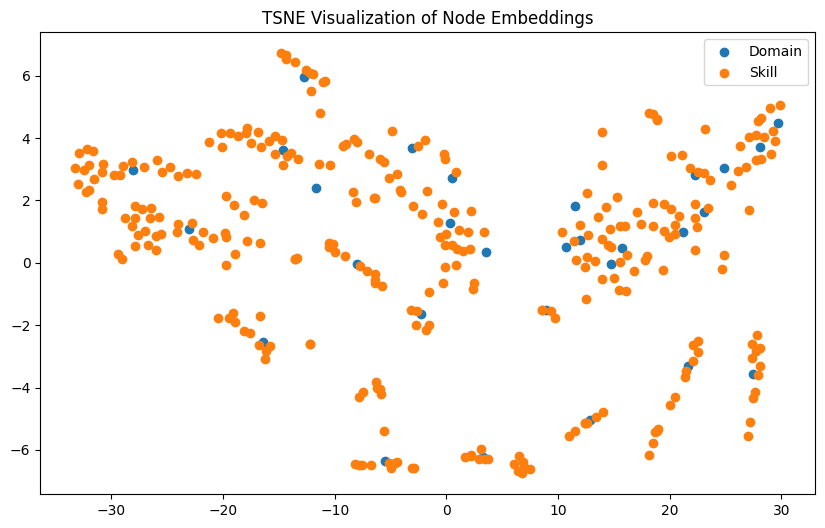

In [130]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index)

embeddings = out.numpy()
labels = ['D' if G.nodes[n]['bipartite'] == 'domain' else 'S' for n in G.nodes]

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(embeddings)

plt.figure(figsize=(10,6))
for i, label in enumerate(set(labels)):
    indices = [j for j, l in enumerate(labels) if l == label]
    plt.scatter(tsne_result[indices, 0], tsne_result[indices, 1], label='Domain' if label=='D' else 'Skill')
plt.legend()
plt.title("TSNE Visualization of Node Embeddings")
plt.show()

In [131]:
test_cases = [
    (["python", "sql", "git",], "Software Developer"),
    (["ml", "python", "sql"], "Data Scientist"),
    (["html5", "sql", "java script"], "Web Developer"),
]


correct = 0
for skills, expected in test_cases:
    recommended = recommend_domains(skills, model, data, node_mapping, reverse_mapping)
    if expected in recommended:
        correct += 1

accuracy = correct / len(test_cases)
print(f"Test Recommendation Accuracy: {accuracy*100}%")


Test Recommendation Accuracy: 100.0%
